 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#### 1.2 Dataset examination

Using the following code, display random images,

In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

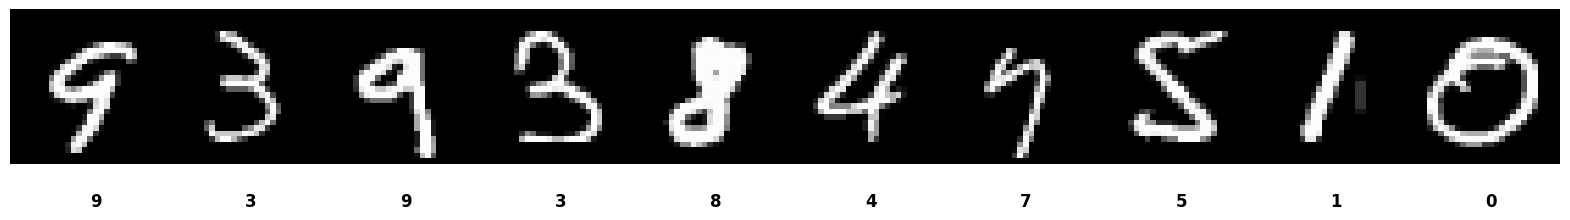

In [4]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [5]:
###################################
# Write your own code here #

# Normalize the input data (scale from 0-255 to 0-1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape to add channel dimension for CNN (height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

###################################

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [6]:
model = Sequential()
###################################
# Write your own code here #

# Input layer and first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(10, activation='softmax'))  # 10 output classes (digits 0-9)

###################################

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [7]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.0

###################################
# Write your own code here #
learning_rate = 0.001
loss = 'categorical_crossentropy'  # For multi-class classification
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
###################################
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [8]:
###################################
# Write your own code here #

# Training hyperparameters
batch_size = 128
epochs = 10
validation_split = 0.2

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    verbose=2
)
###################################

Epoch 1/10
375/375 - 10s - 26ms/step - accuracy: 0.9228 - loss: 0.2590 - val_accuracy: 0.9766 - val_loss: 0.0752
Epoch 2/10
375/375 - 6s - 15ms/step - accuracy: 0.9781 - loss: 0.0713 - val_accuracy: 0.9855 - val_loss: 0.0531
Epoch 3/10
375/375 - 2s - 4ms/step - accuracy: 0.9838 - loss: 0.0528 - val_accuracy: 0.9853 - val_loss: 0.0499
Epoch 4/10
375/375 - 2s - 7ms/step - accuracy: 0.9875 - loss: 0.0405 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 5/10
375/375 - 2s - 4ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9884 - val_loss: 0.0409
Epoch 7/10
375/375 - 3s - 7ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9892 - val_loss: 0.0396
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9903 - val_loss: 0.0329
Epoch 9/10
375/375 - 2s - 4ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9912 - val_loss: 0.033

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

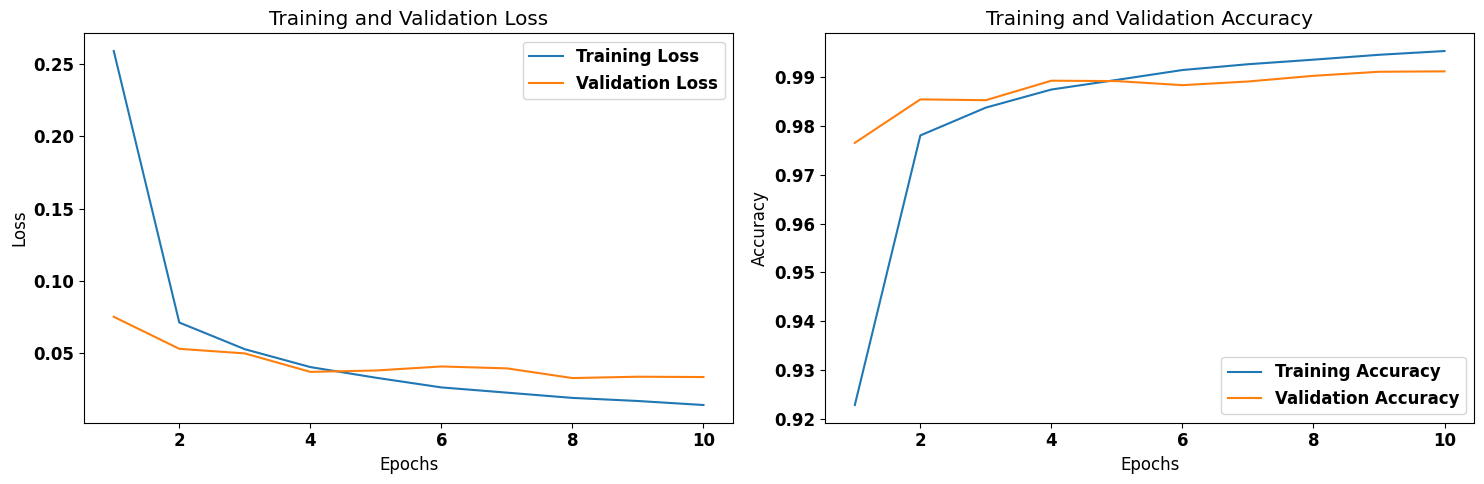

In [9]:
###################################
# Write your own code here #
# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(train_loss) + 1)

# Plot training and validation metrics
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.0305
Test accuracy: 0.9922
Test loss: 0.0246
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


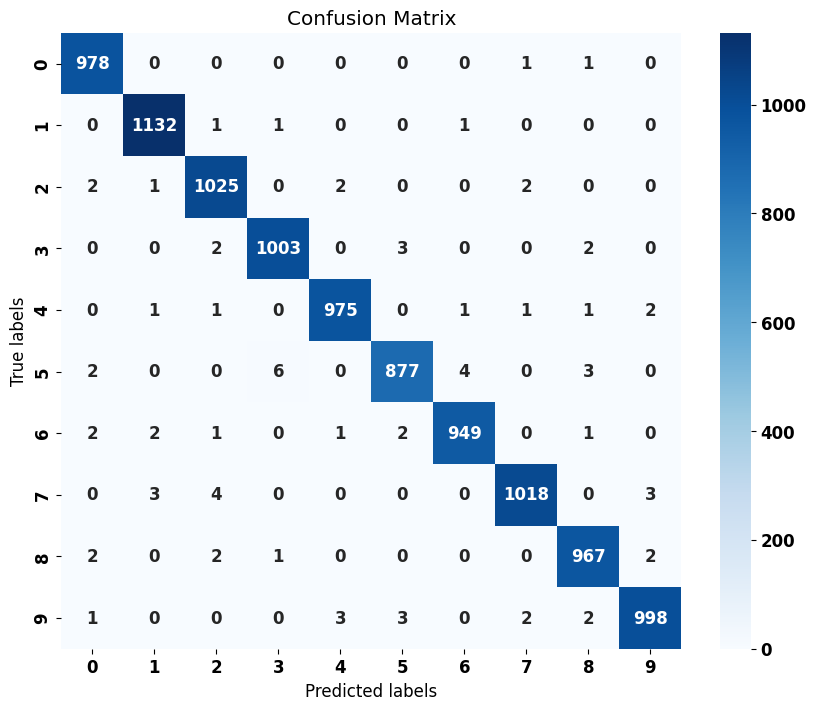

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



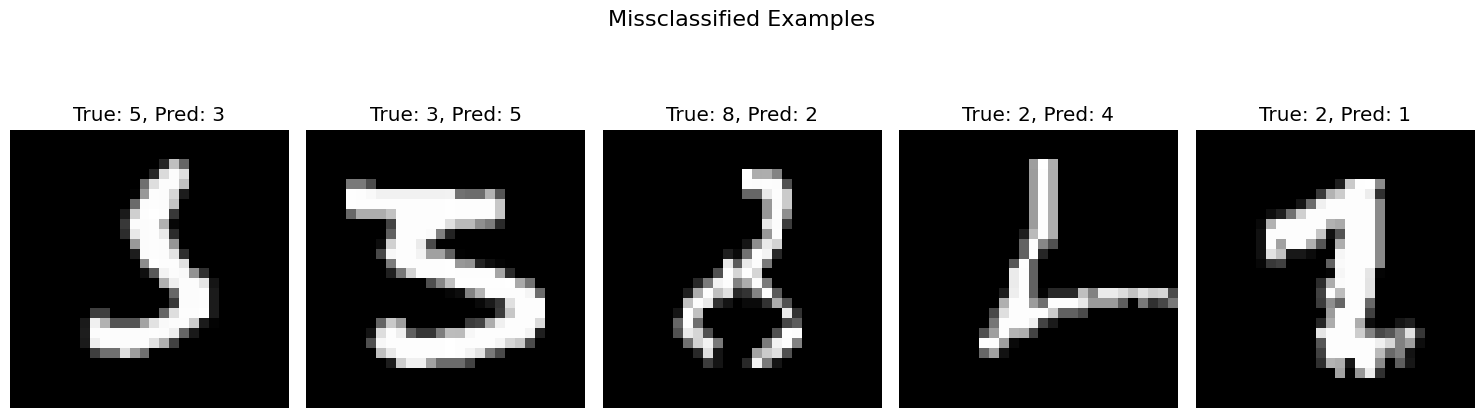

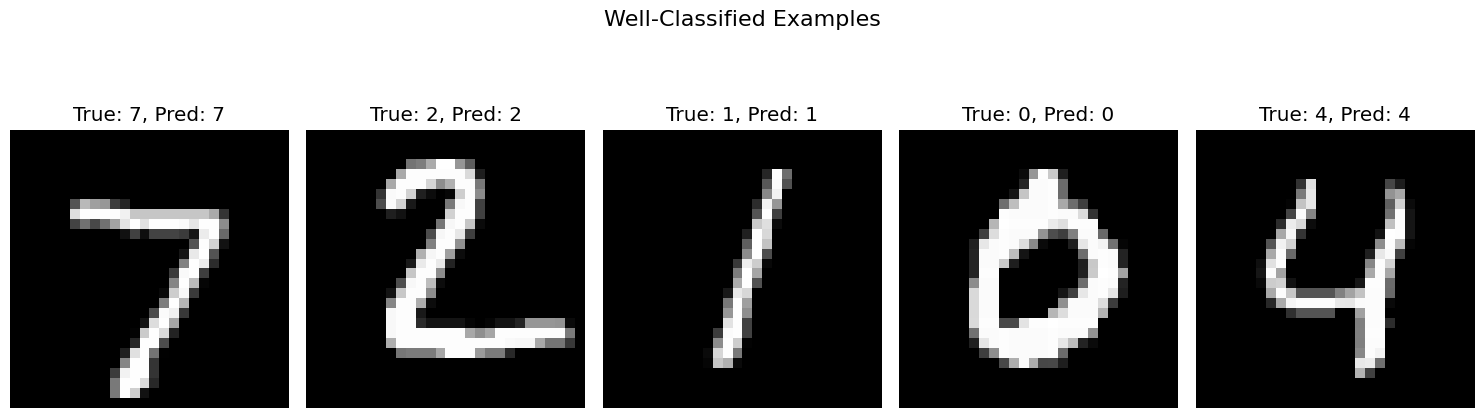

In [10]:
###################################
# Write your own code here #
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_classes))

# Display some misclassified examples
misclassified_idx = np.where(y_pred_classes != y_test)[0]
if len(misclassified_idx) > 0:
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(misclassified_idx[:5]):
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_test[idx]}, Pred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.suptitle("Missclassified Examples", fontsize=16)
    plt.tight_layout()
    plt.show()

# Display some well classified examples
correct_idx = np.where(y_pred_classes == y_test)[0]
if len(correct_idx) > 0:
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(correct_idx[:5]):
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_test[idx]}, Pred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.suptitle("Well-Classified Examples", fontsize=16)
    plt.tight_layout()
    plt.show()
###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it



===== Training model: Baseline =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7260 - loss: 0.8228 - val_accuracy: 0.9742 - val_loss: 0.0904 - learning_rate: 0.0010
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9537 - loss: 0.1544 - val_accuracy: 0.9808 - val_loss: 0.0653 - learning_rate: 0.0010
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9632 - loss: 0.1179 - val_accuracy: 0.9840 - val_loss: 0.0534 - learning_rate: 0.0010
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9730 - loss: 0.0912 - val_accuracy: 0.9863 - val_loss: 0.0491 - learning_rate: 0.0010
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9746 - loss: 0.0835 - val_accuracy: 0.9864 - val_loss: 0.0443 - learning_rate: 0.0010
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9787 - loss: 0.0712 - val_accuracy: 0.9883 - val_loss: 0.0399 - learning_rate: 0.0010
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9800 - loss: 0.0648 - 

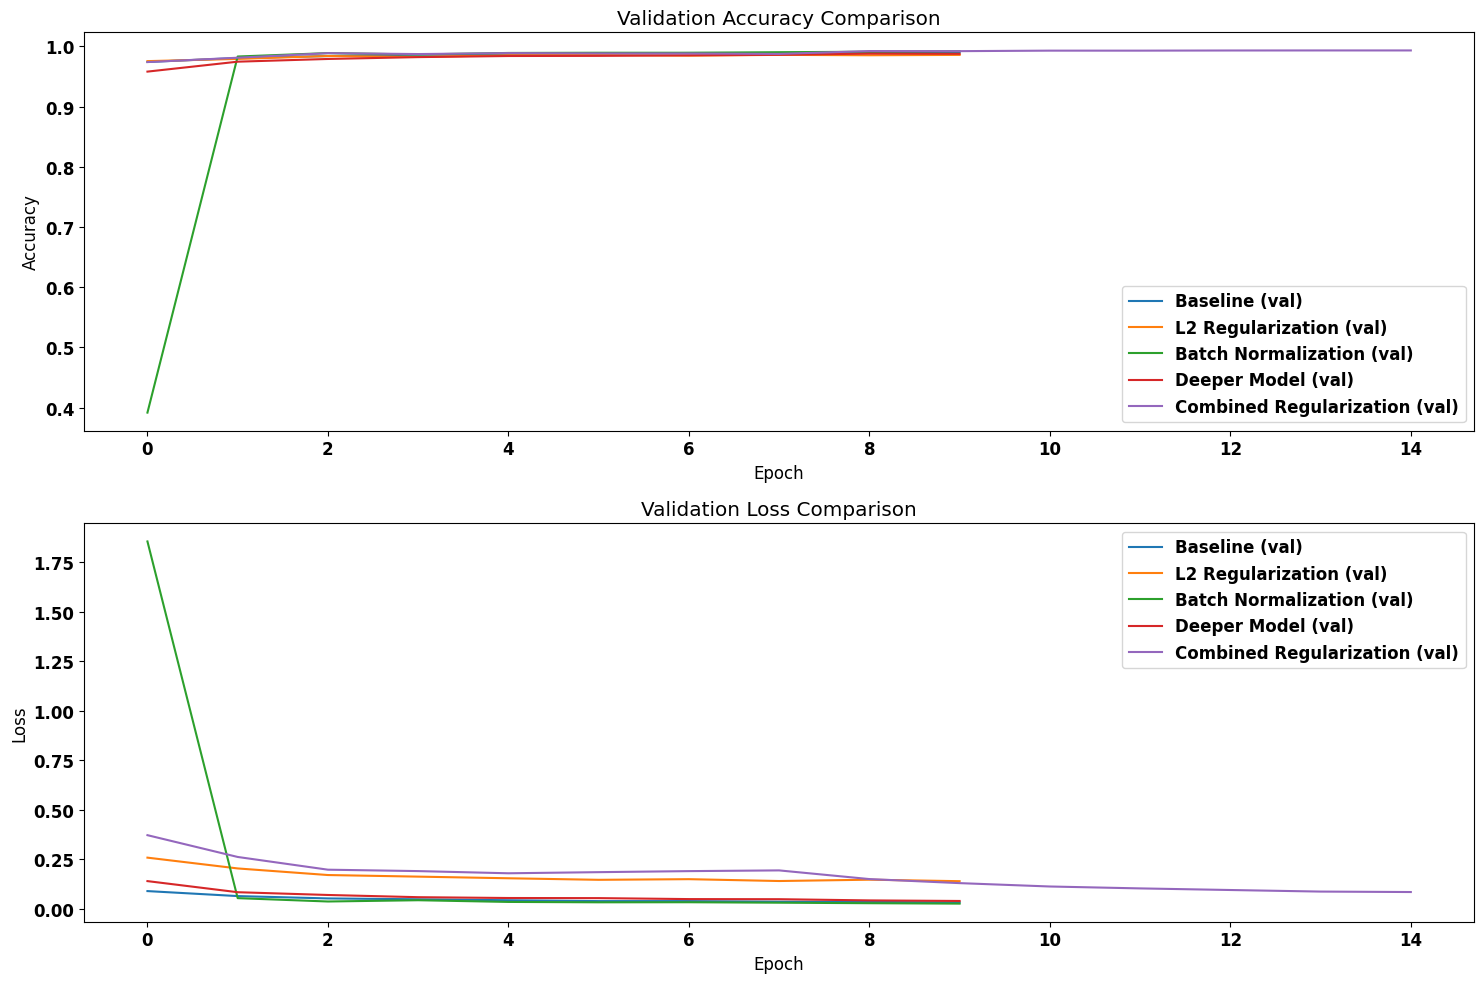

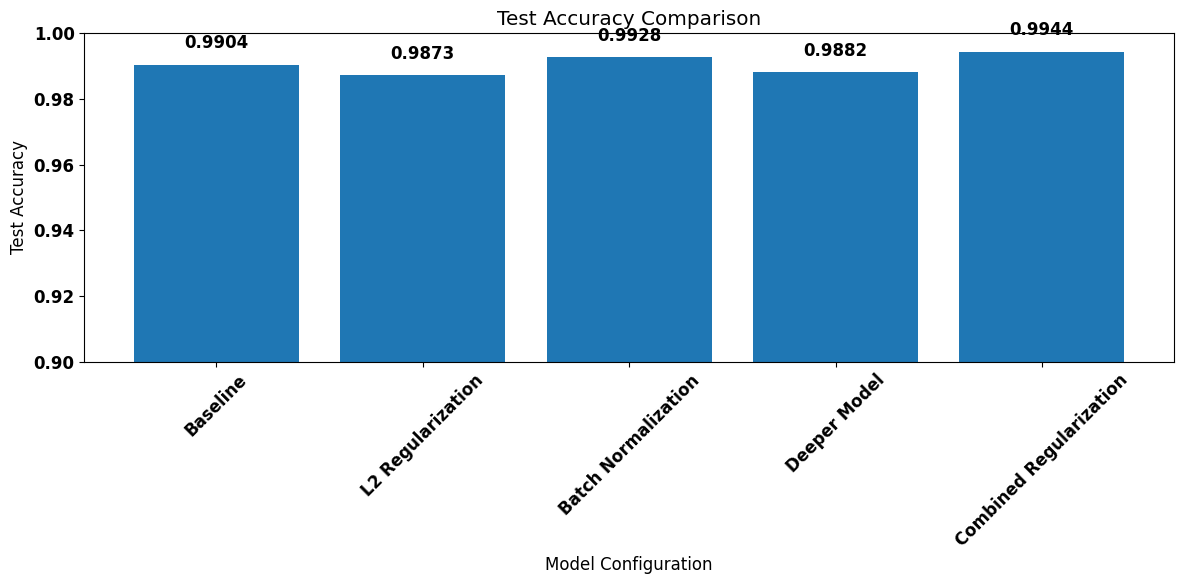


===== Summary of Results =====
Baseline: Test Accuracy = 0.9904, Test Loss = 0.0266
L2 Regularization: Test Accuracy = 0.9873, Test Loss = 0.1328
Batch Normalization: Test Accuracy = 0.9928, Test Loss = 0.0213
Deeper Model: Test Accuracy = 0.9882, Test Loss = 0.0432
Combined Regularization: Test Accuracy = 0.9944, Test Loss = 0.0795

Best model: Combined Regularization with Test Accuracy = 0.9944

Best model configuration:
  name: Combined Regularization
  filters1: 32
  filters2: 64
  filters3: 128
  kernel_size1: (3, 3)
  kernel_size2: (3, 3)
  activation: relu
  padding: same
  dense_units: 128
  dropout_rate1: 0.3
  dropout_rate2: 0.4
  dropout_rate3: 0.5
  use_dropout: True
  use_batch_norm: True
  add_third_conv: True
  l2_lambda: 0.001
  optimizer: adam
  learning_rate: 0.001
  batch_size: 64
  epochs: 15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.99      1.00      0

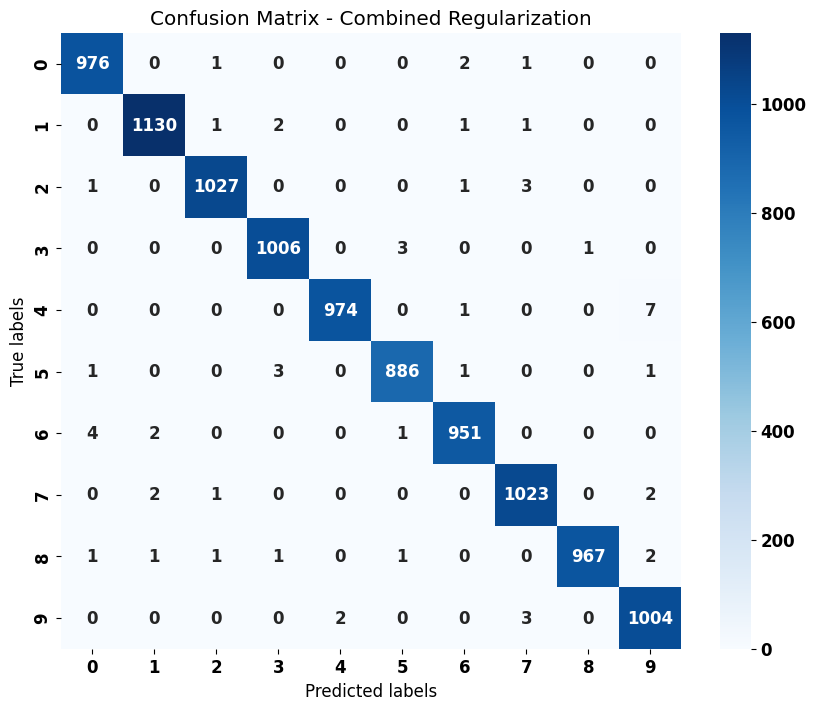

In [11]:
# Hyperparameter tuning and regularization techniques

def build_model(config):
    """Build a CNN model based on configuration parameters"""
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(config['filters1'],
                     kernel_size=config['kernel_size1'],
                     activation=config['activation'],
                     padding=config['padding'],
                     kernel_regularizer=keras.regularizers.l2(config['l2_lambda']),
                     input_shape=(28, 28, 1)))

    if config['use_batch_norm']:
        model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    if config['use_dropout']:
        model.add(Dropout(config['dropout_rate1']))

    # Second convolutional block
    model.add(Conv2D(config['filters2'],
                     kernel_size=config['kernel_size2'],
                     activation=config['activation'],
                     padding=config['padding'],
                     kernel_regularizer=keras.regularizers.l2(config['l2_lambda'])))

    if config['use_batch_norm']:
        model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    if config['use_dropout']:
        model.add(Dropout(config['dropout_rate2']))

    # Optional third convolutional block
    if config['add_third_conv']:
        model.add(Conv2D(config['filters3'],
                         kernel_size=config['kernel_size2'],
                         activation=config['activation'],
                         padding=config['padding'],
                         kernel_regularizer=keras.regularizers.l2(config['l2_lambda'])))

        if config['use_batch_norm']:
            model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        if config['use_dropout']:
            model.add(Dropout(config['dropout_rate2']))

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(config['dense_units'],
                   activation=config['activation'],
                   kernel_regularizer=keras.regularizers.l2(config['l2_lambda'])))

    if config['use_batch_norm']:
        model.add(BatchNormalization())

    if config['use_dropout']:
        model.add(Dropout(config['dropout_rate3']))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    optimizer_name = config['optimizer'].lower()
    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=config['learning_rate'])
    elif optimizer_name == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=config['learning_rate'], momentum=0.9)
    elif optimizer_name == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=config['learning_rate'])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define different model configurations
configurations = [
    {
        # Baseline model
        'name': 'Baseline',
        'filters1': 32,
        'filters2': 64,
        'filters3': 128,
        'kernel_size1': (3, 3),
        'kernel_size2': (3, 3),
        'activation': 'relu',
        'padding': 'valid',
        'dense_units': 128,
        'dropout_rate1': 0.25,
        'dropout_rate2': 0.25,
        'dropout_rate3': 0.5,
        'use_dropout': True,
        'use_batch_norm': False,
        'add_third_conv': False,
        'l2_lambda': 0.0,
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'batch_size': 128,
        'epochs': 10
    },
    {
        # L2 regularization model
        'name': 'L2 Regularization',
        'filters1': 32,
        'filters2': 64,
        'filters3': 128,
        'kernel_size1': (3, 3),
        'kernel_size2': (3, 3),
        'activation': 'relu',
        'padding': 'valid',
        'dense_units': 128,
        'dropout_rate1': 0.25,
        'dropout_rate2': 0.25,
        'dropout_rate3': 0.5,
        'use_dropout': True,
        'use_batch_norm': False,
        'add_third_conv': False,
        'l2_lambda': 0.001,  # Added L2 regularization
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'batch_size': 128,
        'epochs': 10
    },
    {
        # Batch normalization model
        'name': 'Batch Normalization',
        'filters1': 32,
        'filters2': 64,
        'filters3': 128,
        'kernel_size1': (3, 3),
        'kernel_size2': (3, 3),
        'activation': 'relu',
        'padding': 'valid',
        'dense_units': 128,
        'dropout_rate1': 0.25,
        'dropout_rate2': 0.25,
        'dropout_rate3': 0.5,
        'use_dropout': True,
        'use_batch_norm': True,  # Added batch normalization
        'add_third_conv': False,
        'l2_lambda': 0.0,
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'batch_size': 128,
        'epochs': 10
    },
    {
        # Deeper model
        'name': 'Deeper Model',
        'filters1': 32,
        'filters2': 64,
        'filters3': 128,
        'kernel_size1': (3, 3),
        'kernel_size2': (3, 3),
        'activation': 'relu',
        'padding': 'valid',
        'dense_units': 128,
        'dropout_rate1': 0.25,
        'dropout_rate2': 0.25,
        'dropout_rate3': 0.5,
        'use_dropout': True,
        'use_batch_norm': False,
        'add_third_conv': True,  # Added third conv layer
        'l2_lambda': 0.0,
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'batch_size': 128,
        'epochs': 10
    },
    {
        # Combined regularization model
        'name': 'Combined Regularization',
        'filters1': 32,
        'filters2': 64,
        'filters3': 128,
        'kernel_size1': (3, 3),
        'kernel_size2': (3, 3),
        'activation': 'relu',
        'padding': 'same',  # Changed to 'same' padding
        'dense_units': 128,
        'dropout_rate1': 0.3,  # Increased dropout
        'dropout_rate2': 0.4,  # Increased dropout
        'dropout_rate3': 0.5,
        'use_dropout': True,
        'use_batch_norm': True,  # Added batch normalization
        'add_third_conv': True,  # Added third conv layer
        'l2_lambda': 0.001,  # Added L2 regularization
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'batch_size': 64,  # Smaller batch size
        'epochs': 15  # More epochs
    }
]

# Function to train and evaluate a model with early stopping
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def train_and_evaluate(config, X_train, y_train, X_test, y_test):
    # Build model
    model = build_model(config)

    # Define callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.00001
    )

    # Train model
    history = model.fit(
        X_train, y_train,
        batch_size=config['batch_size'],
        epochs=config['epochs'],
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_loss, test_acc

# Results storage
results = []

# Run experiments for each configuration
for config in configurations:
    print(f"\n\n===== Training model: {config['name']} =====")
    model, history, test_loss, test_acc = train_and_evaluate(
        config, X_train, y_train_encoded, X_test, y_test_encoded
    )

    results.append({
        'name': config['name'],
        'model': model,
        'history': history,
        'test_loss': test_loss,
        'test_acc': test_acc
    })

    print(f"{config['name']} - Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# Plot comparison of results
plt.figure(figsize=(15, 10))

# Plot 1: Training and validation accuracy comparison
plt.subplot(2, 1, 1)
for result in results:
    plt.plot(result['history'].history['val_accuracy'], label=f"{result['name']} (val)")

plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot 2: Training and validation loss comparison
plt.subplot(2, 1, 2)
for result in results:
    plt.plot(result['history'].history['val_loss'], label=f"{result['name']} (val)")

plt.title('Validation Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Bar chart of test accuracies
names = [result['name'] for result in results]
accuracies = [result['test_acc'] for result in results]

plt.figure(figsize=(12, 6))
plt.bar(names, accuracies)
plt.xlabel('Model Configuration')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0.9, 1.0)  # Adjust as needed
plt.xticks(rotation=45)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Print summary of findings
print("\n===== Summary of Results =====")
for result in results:
    print(f"{result['name']}: Test Accuracy = {result['test_acc']:.4f}, Test Loss = {result['test_loss']:.4f}")

# Find best model
best_idx = np.argmax([result['test_acc'] for result in results])
best_model = results[best_idx]
print(f"\nBest model: {best_model['name']} with Test Accuracy = {best_model['test_acc']:.4f}")

# Analyze the best model in detail
best_config = [config for config in configurations if config['name'] == best_model['name']][0]
print("\nBest model configuration:")
for key, value in best_config.items():
    print(f"  {key}: {value}")

# Generate confusion matrix and classification report for best model
y_pred = best_model['model'].predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print("\nClassification Report for Best Model:")
print(classification_report(y_true, y_pred_classes))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix - {best_model["name"]}')
plt.show()